# Pynq-Z1 Video input/output

## Open CV

OpenCV is already installed on the Pynq-Z1 image. 

Start HDMI in/out

In [1]:
from pynq.drivers.video import HDMI
hdmi_out = HDMI('out')
hdmi_in = HDMI('in', hdmi_out.frame_buffer)

hdmi_out.mode(4) # 1920x1080@60Hz

hdmi_in.start()
hdmi_out.start()

Grab a frame from HDMI, save it as a numpy array and reorder the colour

In [5]:
import numpy as np
frame = hdmi_out.frame_raw()
np_frame= (np.frombuffer(frame, dtype=np.uint8)).reshape(1080,1920,3)
np_frame[:,:,[0,1,2]] = np_frame[:,:,[2,0,1]] # reorder RGB

Display the image

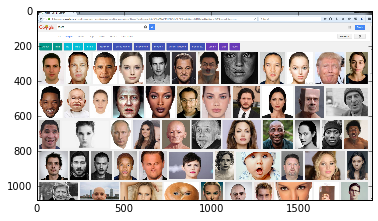

In [6]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(np_frame)
plt.show()

Do face detection

In [7]:
import cv2

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')


gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [8]:
%%timeit
for (x,y,w,h) in faces:
    cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = np_frame[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

1 loop, best of 3: 3.21 s per loop


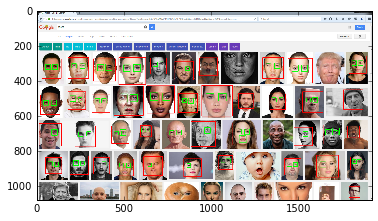

In [9]:
plt.imshow(np_frame)
plt.show()

Stop Streaming HDMI in to out

In [12]:
print("Switch to next frame buffer (do not overwrite our OpenCV image). Next frame buffer: " + str(hdmi_in.frame_index_next()))

Switch to next frame buffer (do not overwrite our OpenCV image). Next frame buffer: 1


Convert numpy array to bytearray

In [28]:
np_frame[:,:,[0,1,2]] = np_frame[:,:,[1,2,0]] # reorder RGB
frame = bytearray(np_frame)

Output to processed frame via HDMI

In [29]:
hdmi_out.frame_raw(frame)

In [30]:
import numpy as np
frame = hdmi_out.frame_raw()
np_frame= (np.frombuffer(frame, dtype=np.uint8)).reshape(1080,1920,3)
np_frame[:,:,[0,1,2]] = np_frame[:,:,[2,0,1]] # reorder RGB

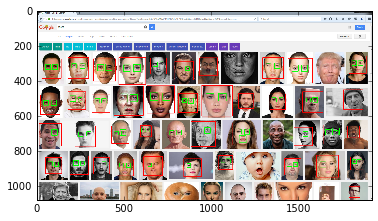

In [31]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(np_frame)
plt.show()

Continue Streaming HDMI in to out

In [32]:
hdmi_in.frame_index(0)

In [33]:
hdmi_in.stop()
hdmi_out.stop()
del hdmi_in, hdmi_out